<a href="https://colab.research.google.com/github/priyank21112000/Hospitality-Employees-Time-Series-Forecasting/blob/main/Hospitality-Employees-Time-Series-Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Priyank Sanghvi - Hospitality Employees - Time Series Forecasting

Accidental Death in USA dataset -
A seasonal time series of California Hospitality Industry Employees.
This dataset contains the number of employees in thousands of persons as monthly averages from 1990-01-01 to 2018-12-01 (YYYY-MM-DD).

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
df = pd.read_csv("HospitalityEmployees.csv")

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df['Employees'] = pd.to_numeric(df['Employees'], errors='coerce')

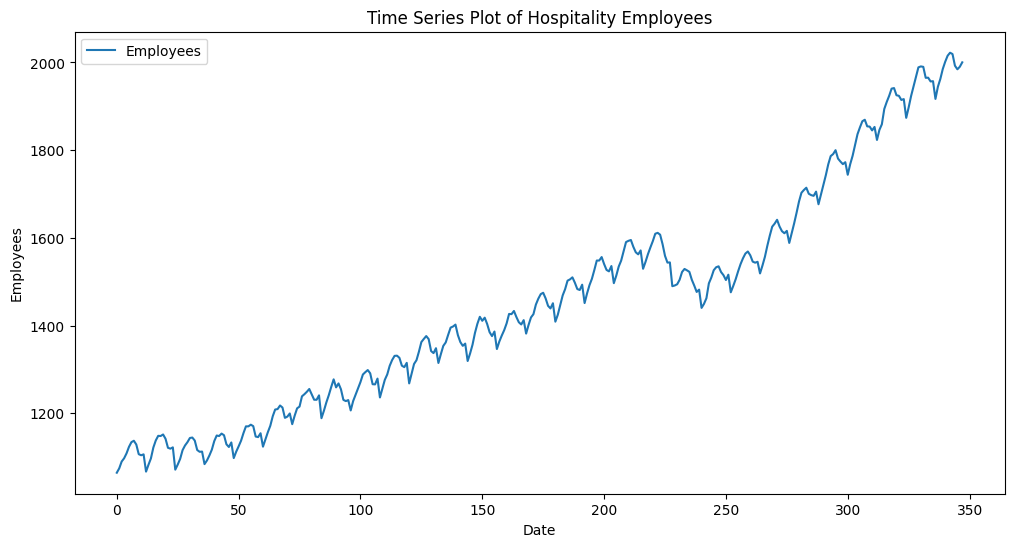

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Employees'], label='Employees')
plt.title('Time Series Plot of Hospitality Employees')
plt.xlabel('Date')
plt.ylabel('Employees')
plt.legend()
plt.show()

Decomposition of Time Series

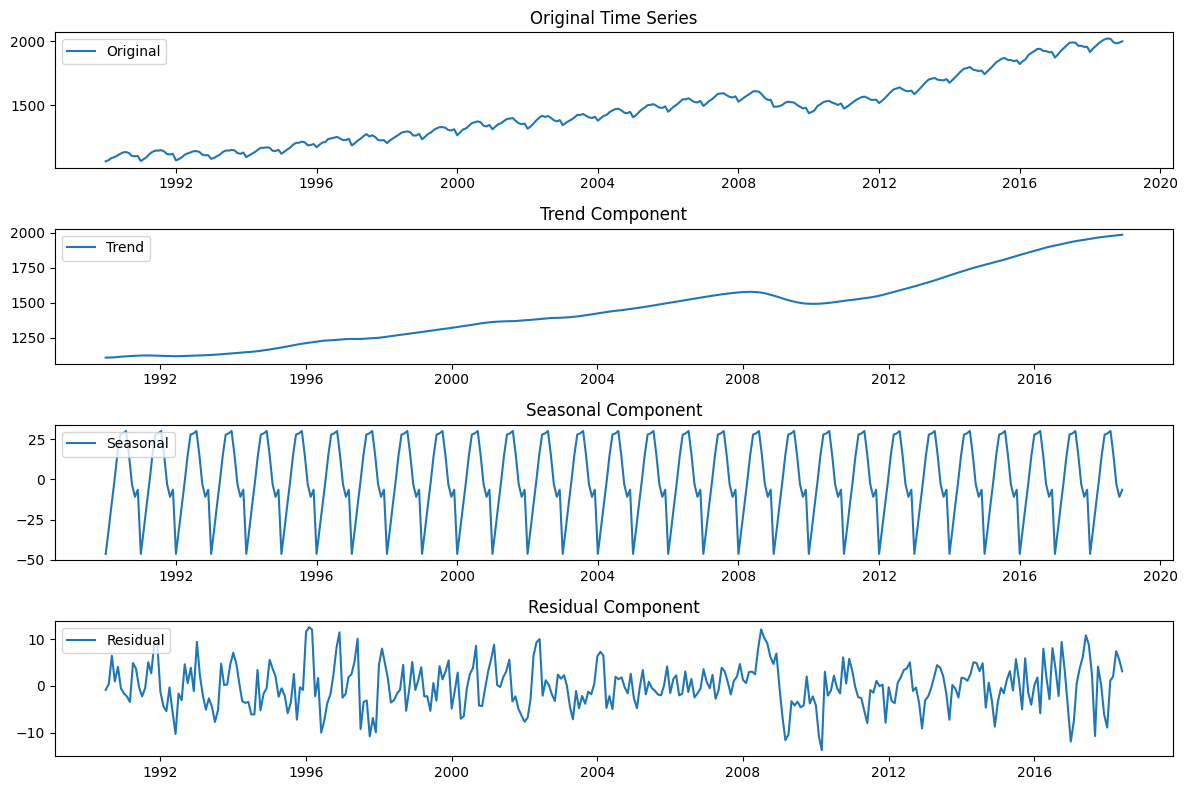

In [ ]:
df = df.set_index('Date')

# Perform seasonal decomposition
result = seasonal_decompose(df['Employees'], model='additive', period=12)  # Assuming monthly seasonality

# Plot the decomposition components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(df['Employees'], label='Original')
plt.legend(loc='upper left')
plt.title('Original Time Series')

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual')
plt.legend(loc='upper left')
plt.title('Residual Component')

plt.tight_layout()
plt.show()

Dickey fuller test -
To check if the data is stationary


If p value is greater than 0.05, the data is not stationary


If p value is less than 0.05, the data is stationary

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Employees'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.901284
p-value: 0.993107
Critical Values:
	1%: -3.450
	5%: -2.870
	10%: -2.571


The dickey fuller test shows that the time series is not stationary.

Differencing - To make the data stationary

In [ ]:
# Calculate the first-order difference
df['Employees_diff'] = df['Employees'].diff()

# Drop missing values created by differencing
df = df.dropna()

# Print the differenced data
print(df[['Employees_diff']])

            Employees_diff
Date                      
1990-02-01            10.0
1990-03-01            15.5
1990-04-01             7.4
1990-05-01            11.3
1990-06-01            14.8
...                    ...
2018-08-01            -3.0
2018-09-01           -26.6
2018-10-01            -8.2
2018-11-01             5.8
2018-12-01            10.1

[347 rows x 1 columns]


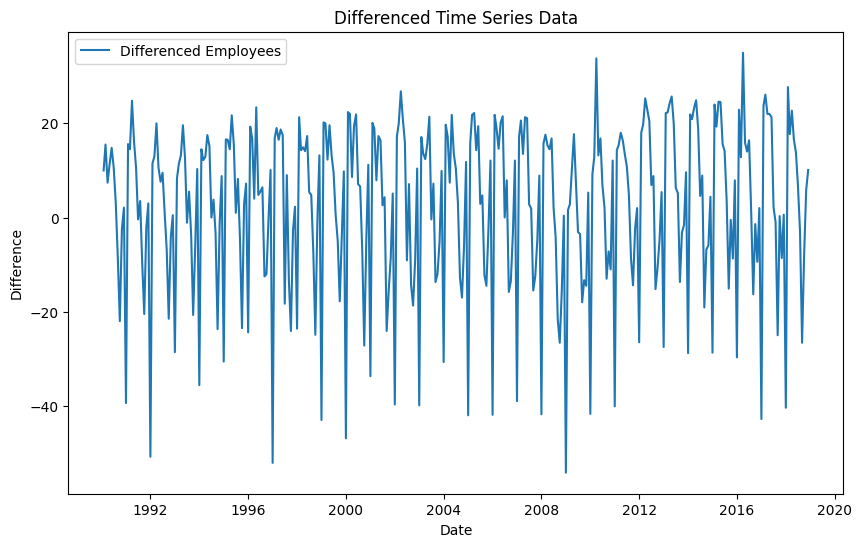

In [ ]:
# Plotting the differenced data
plt.figure(figsize=(10, 6))
plt.plot(df['Employees_diff'], label='Differenced Employees')
plt.title('Differenced Time Series Data')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.legend()
plt.show()

Performing the dickey fuller test again to check if the data is stationary

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Employees_diff'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.068279
p-value: 0.028992
Critical Values:
	1%: -3.450
	5%: -2.870
	10%: -2.571


Data is now stationary

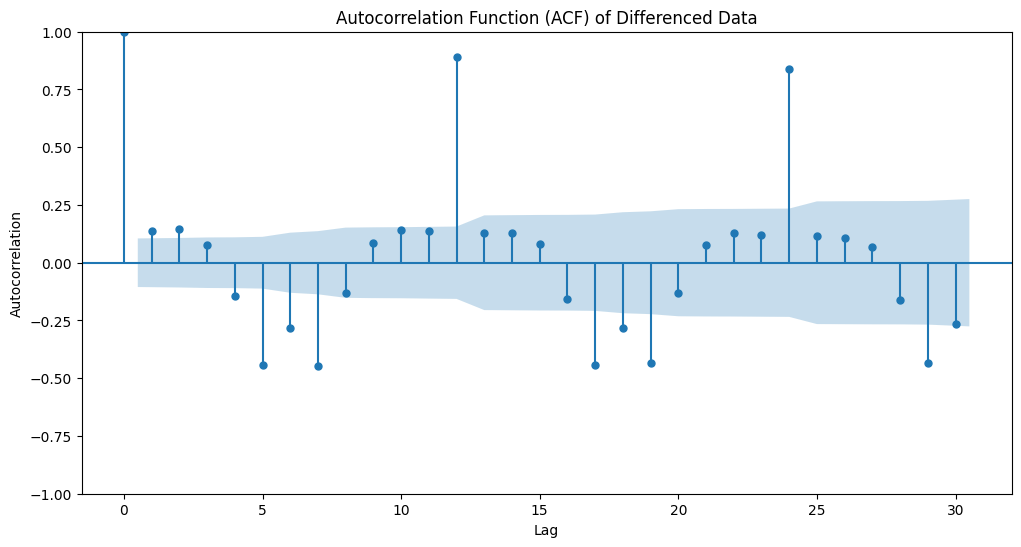

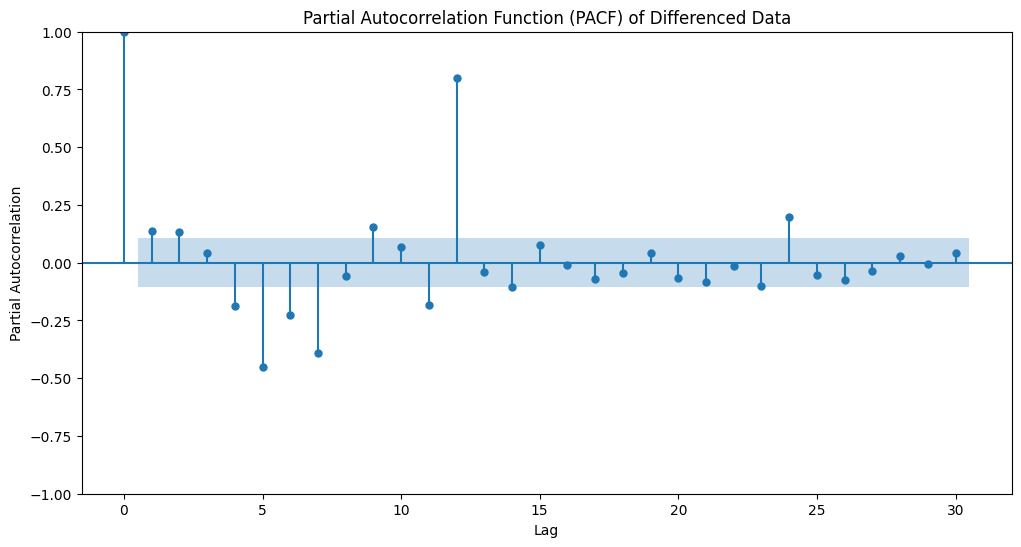

In [ ]:
#ACF and PACF plots
plt.figure(figsize=(12, 6))
plot_acf(df['Employees_diff'].dropna(), lags=30, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) of Differenced Data')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(df['Employees_diff'].dropna(), lags=30, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) of Differenced Data')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

Comparing AIC values to find the best model which has minimum AIC value

In [ ]:
import itertools
from statsmodels.tsa.arima.model import ARIMA

import warnings
warnings.filterwarnings('ignore')

# Define the range of p, d, q values
p_values = d_values = q_values = range(0, 4)

# Generate all possible combinations of p, d, q
pdq_combinations = list(itertools.product(p_values, d_values, q_values))

# Calculate AIC for each combination
aic_values = []
for pdq in pdq_combinations:
    try:
        model = ARIMA(df['Employees_diff'], order=pdq)
        results = model.fit()
        aic_values.append((pdq, results.aic))
    except:
        continue

# Find the combination with the minimum AIC
min_aic_combination = min(aic_values, key=lambda x: x[1])

print(f"Minimum AIC Combination: {min_aic_combination[0]}")
print(f"Minimum AIC Value: {min_aic_combination[1]}")

Minimum AIC Combination: (2, 0, 3)
Minimum AIC Value: 2734.9806994458804


Loading the necessary libraries

In [ ]:
!pip install pmdarima
from pmdarima import auto_arima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.8 MB/s eta 0:00:00


Auto ARIMA to find the best performing model

In [ ]:
auto_arima(df['Employees_diff'], seasonal=True, m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  347
Model:             SARIMAX(1, 0, 2)x(1, 0, [1], 12)   Log Likelihood               -1098.210
Date:                              Sun, 17 Dec 2023   AIC                           2208.421
Time:                                      01:26:18   BIC                           2231.517
Sample:                                  02-01-1990   HQIC                          2217.617
                                       - 12-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9245      0.045     20.572      0.000       0.836       1.013
ma.L1         -0.9441      0.070    -13.534      0.000      -1.081      -0.807
ma.L2          0.1287      0.060      2.149      0.032       0.011       0.246
ar.S.L12       0.9972      0.001    701.943      0.000       0.994       1.000
ma.S.L12      -0.7491      0.043    -17.337      0.000      -0.834      -0.664
sigma2        29.3006      1.718     17.059      0.000      25.934      32.667
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                67.40
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.10
Prob(H) (two-sided):                  0.40   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Fitting the SARIMAX model

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMAX model
order = (1, 0, 2)
seasonal_order = (1, 0, 1, 12)  # The [1] in the seasonal order represents the order of the seasonal component
model = SARIMAX(df['Employees_diff'], order=order, seasonal_order=seasonal_order)
results = model.fit()

# Display the model summary
print(results.summary())

                                      SARIMAX Results                                       
Dep. Variable:                       Employees_diff   No. Observations:                  347
Model:             SARIMAX(1, 0, 2)x(1, 0, [1], 12)   Log Likelihood               -1098.210
Date:                              Sun, 17 Dec 2023   AIC                           2208.421
Time:                                      01:31:14   BIC                           2231.517
Sample:                                  02-01-1990   HQIC                          2217.617
                                       - 12-01-2018                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9245      0.045     20.572      0.000       0.836       1.013
ma.L1         -0.94

Checking the residuals

Text(0, 0.5, 'Residuals')

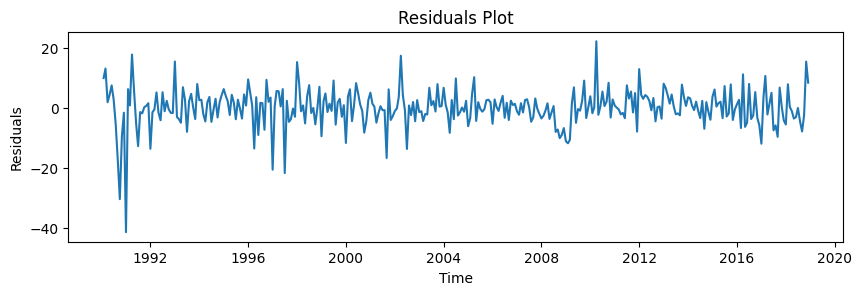

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.stats.diagnostic import acorr_ljungbox

residuals = results.resid

# Plot residuals
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(residuals)
plt.title('Residuals Plot')
plt.xlabel('Time')
plt.ylabel('Residuals')

Histogram of Residuals - if the residuals are normally distributed, the model is a good fit

Text(0.5, 1.0, 'Histogram of Residuals')

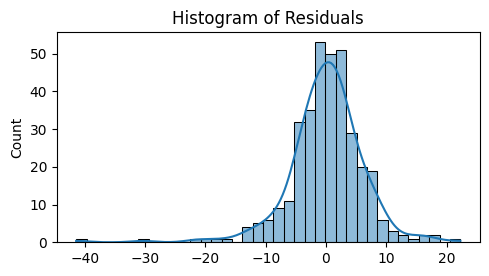

In [ ]:
import seaborn as sns
# Histogram
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 2)
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')

ACF of Residuals - if the ACF plot does not have significant lags, the model is a good fit

Text(0.5, 1.0, 'ACF Plot of Residuals')

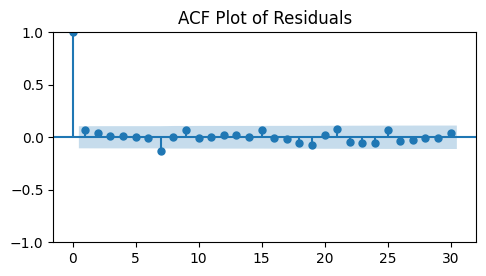

In [ ]:
# ACF plot
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 4)
plot_acf(residuals, lags=30, ax=plt.gca())
plt.title('ACF Plot of Residuals')

ACF plot has no significant lags

Forecasting the SARIMAX model and plotting the forecast

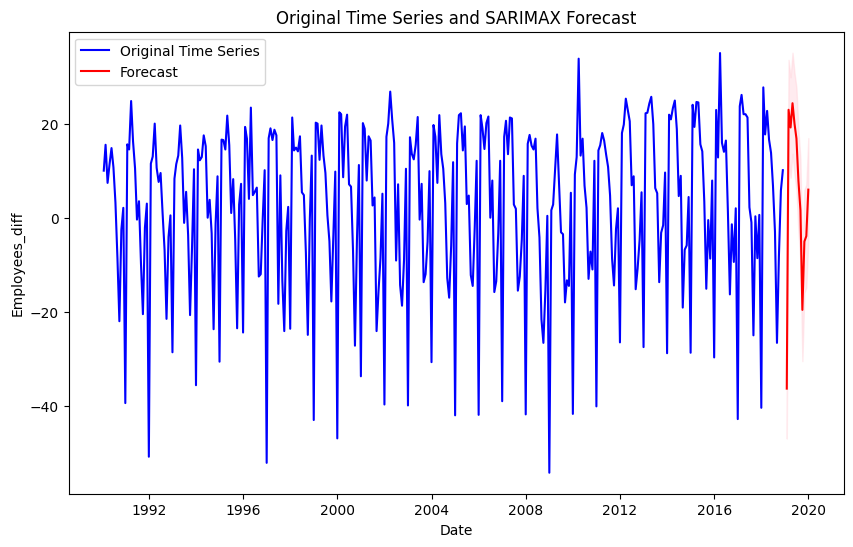

In [ ]:
# Assuming 'results' is your SARIMAX model results object
forecast_steps = 12  # Change this to the number of steps you want to forecast

# Get forecast and confidence intervals
forecast = results.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=df.index[-1], periods=forecast_steps + 1, freq='M')[1:]

# Plotting the original time series
plt.figure(figsize=(10, 6))
plt.plot(df['Employees_diff'], label='Original Time Series', color='blue')

# Plotting the forecast
plt.plot(forecast_index, forecast.predicted_mean, label='Forecast', color='red')

# Confidence intervals (you can customize the transparency and color)
plt.fill_between(forecast_index, forecast.conf_int()['lower Employees_diff'], forecast.conf_int()['upper Employees_diff'], color='pink', alpha=0.3)

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Employees_diff')
plt.title('Original Time Series and SARIMAX Forecast')

# Adding a legend
plt.legend()

# Show the plot
plt.show()
